 #Credit Card Fraud Analysis – Exploratory Data Analysis (EDA)

**Objective:** Explore transaction patterns and identify factors associated with fraudulent activity using EDA.  
**Tools:** Python (pandas, matplotlib)  
**Dataset:** Credit card transactions (2019–2020)  

## 1. Libraries
import the core libraries used for data handling (pandas), numerical support (numpy), and visualization (matplotlib).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Make tables easier to read
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


## 2. Data Loading
The dataset is loaded from a CSV file and previewed to confirm successful import and to inspect the columns.


In [2]:
# Load dataset
df = pd.read_csv("credit_card_transactions.csv")

# Preview first rows
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


## 3. Dataset Overview
Check the dataset size, column data types, and numeric summary statistics to understand the structure and contents.


In [3]:
print("Shape (rows, columns):", df.shape)
df.info()


Shape (rows, columns): (1296675, 24)
<class 'pandas.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  str    
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  str    
 4   category               1296675 non-null  str    
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  str    
 7   last                   1296675 non-null  str    
 8   gender                 1296675 non-null  str    
 9   street                 1296675 non-null  str    
 10  city                   1296675 non-null  str    
 11  state                  1296675 non-null  str    
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float

In [4]:
df.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


## 4. Data Quality Checks
Inspect missing values and duplicates to identify any data issues that may affect analysis.


In [5]:
# Missing values per column
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


merch_zipcode    195973
dtype: int64

In [6]:
# Duplicate rows
df.duplicated().sum()


np.int64(0)

## 5. Data Cleaning
Removing any unnecessary index column and convert date fields into datetime format for time-based analysis.


In [7]:
# Remove unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Convert date columns to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Confirm changes
df[['trans_date_trans_time', 'dob']].dtypes


trans_date_trans_time    datetime64[us]
dob                      datetime64[us]
dtype: object

In [8]:
# Validation checks
print("Columns:", df.columns.tolist())
print("Date types:\n", df[['trans_date_trans_time', 'dob']].dtypes)


Columns: ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode']
Date types:
 trans_date_trans_time    datetime64[us]
dob                      datetime64[us]
dtype: object


## 6. Sampling
Because the dataset is large, we create a representative sample (200,000 rows) to speed up visualization and exploration while preserving overall patterns.


In [9]:
# Sample for faster EDA (keeps analysis efficient without losing general patterns)
df_sample = df.sample(n=200_000, random_state=42)

df_sample.shape


(200000, 23)

## 7. Feature Engineering
created time-related features (month, year, hour, day of week) to analyze transaction behavior and fraud patterns across time.


In [10]:
# Create time-based features for deeper analysis
df_sample['month'] = df_sample['trans_date_trans_time'].dt.to_period('M')
df_sample['year'] = df_sample['trans_date_trans_time'].dt.year
df_sample['hour'] = df_sample['trans_date_trans_time'].dt.hour
df_sample['day_of_week'] = df_sample['trans_date_trans_time'].dt.day_name()

df_sample[['trans_date_trans_time', 'month', 'year', 'hour', 'day_of_week']].head()


,trans_date_trans_time,month,year,hour,day_of_week
1045211,2020-03-09 15:09:26,2020-03,2020,15,Monday
547406,2019-08-22 15:49:01,2019-08,2019,15,Thursday
110142,2019-03-04 01:34:16,2019-03,2019,1,Monday
1285953,2020-06-16 20:04:38,2020-06,2020,20,Tuesday
271705,2019-05-14 05:54:48,2019-05,2019,5,Tuesday


## 8. Univariate Analysis
examined individual variables (e.g., transaction amount, categories, and fraud frequency) to understand distributions and basic patterns.


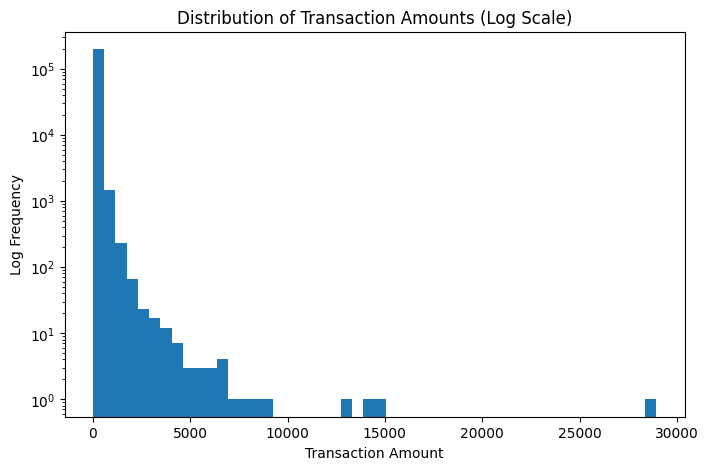

In [12]:
#Transaction Amount Distribution
plt.figure(figsize=(8,5))
plt.hist(df_sample['amt'], bins=50, log=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Log Frequency')
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.show()


In [ ]:
**Interpretation:** Transaction amounts are right-skewed: most purchases are small, while a few transactions are very large (outliers).


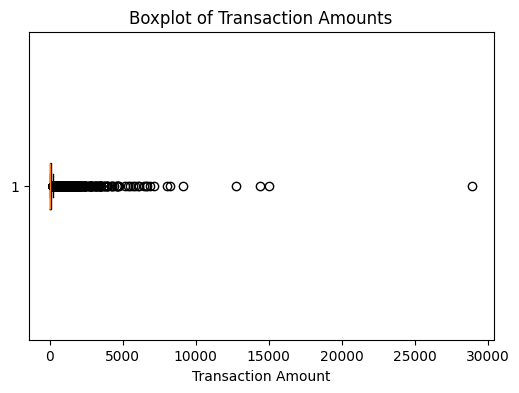

In [37]:
#transaction amount
plt.figure(figsize=(6,4))
plt.boxplot(df_sample['amt'], vert=False)
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amounts') 
plt.show()

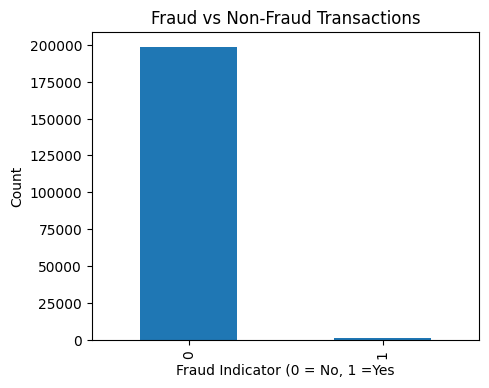

In [14]:
#Fraud Indicator
fraud_counts = df_sample['is_fraud'].value_counts()
plt.figure(figsize=(5, 4))
fraud_counts.plot(kind='bar')
plt.xlabel('Fraud Indicator (0 = No, 1 =Yes')
plt.ylabel('Count')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


In [ ]:
**Interpretation:** Fraud cases are rare (strong class imbalance), which is typical for real-world fraud datasets.


### Transaction Category Distribution insight
The majority of transactions fall into everyday spending categories such as gas, transport, groceries, and home-related purchases.

In [17]:
#Top categories by count
df_sample['category'].value_counts().head(10)

category
gas_transport     20212
grocery_pos       19065
home              19026
shopping_pos      17903
kids_pets         17420
shopping_net      15058
entertainment     14701
food_dining       14129
personal_care     13974
health_fitness    13323
Name: count, dtype: int64

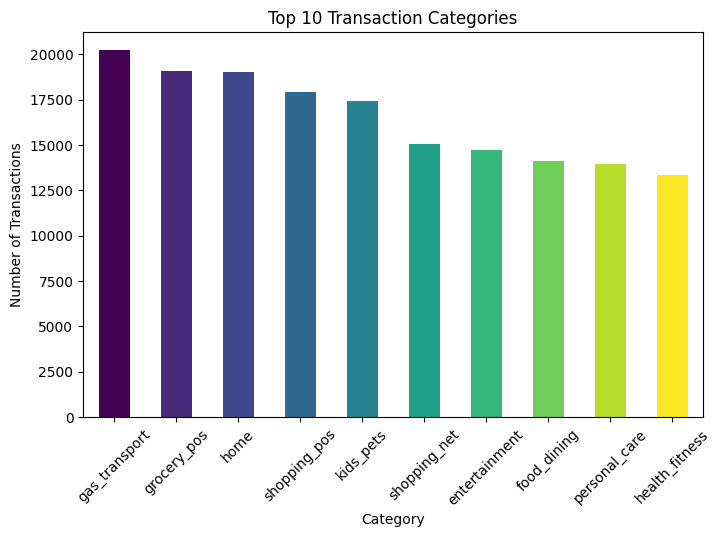

In [18]:
import numpy as np

top_categories = df_sample['category'].value_counts().head(10)

# Create a color array from viridis
colors = plt.cm.viridis(
    np.linspace(0, 1, len(top_categories))
)

plt.figure(figsize=(8, 5))
top_categories.plot(
    kind='bar',
    color=colors
)

plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Transaction Categories')
plt.xticks(rotation=45)
plt.show()


In [20]:
# See the highest transactions
df_sample['amt'].nlargest(10)

787549     28948.90
752016     15047.03
413937     14407.25
59564      12788.07
655751      9092.75
681492      8255.19
541787      8059.02
636885      7123.00
939366      6880.74
1234843     6684.70
Name: amt, dtype: float64

In [21]:
# Outlier threshold using IQR (standard EDA method)
Q1 = df_sample['amt'].quantile(0.25)
Q3 = df_sample['amt'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_bound

np.float64(193.165)

In [22]:
# Count outliers above the bound
outliers = df_sample[df_sample['amt'] > upper_bound]
outliers.shape[0]

10330

In [23]:
# Show some outlier rows (amount + key identifiers)
outliers[['trans_date_trans_time', 'amt', 'category', 'merchant', 'is_fraud']].head(10)

,trans_date_trans_time,amt,category,merchant,is_fraud
1045211,2020-03-09 15:09:26,194.51,misc_pos,fraud_Towne LLC,0
406410,2019-07-03 11:45:07,207.59,grocery_pos,fraud_Rau and Sons,0
1038025,2020-03-06 16:06:54,215.94,entertainment,fraud_Cruickshank-Mills,0
395088,2019-06-29 18:41:27,538.64,travel,fraud_Ebert-Daugherty,0
1049132,2020-03-10 19:42:02,1047.60,shopping_net,"fraud_Zboncak, Rowe and Murazik",1
452298,2019-07-20 05:35:53,234.36,grocery_pos,fraud_Koepp-Witting,0
751536,2019-11-17 17:02:29,448.33,travel,"fraud_Schroeder, Wolff and Hermiston",0
1272023,2020-06-12 15:24:09,456.21,misc_pos,fraud_Kemmer-Buckridge,0
743205,2019-11-14 02:12:11,285.37,misc_pos,fraud_Boyer PLC,0
1023511,2020-02-28 01:48:53,411.18,misc_pos,"fraud_Terry, Johns and Bins",0


### Monthly Total Transaction Amount
The total transaction amount varies substantially over time and mirrors trends in transaction volume. A pronounced peak indicates the presence of high-value transactions during that period, while early 2020 shows a notable decline in overall spending.


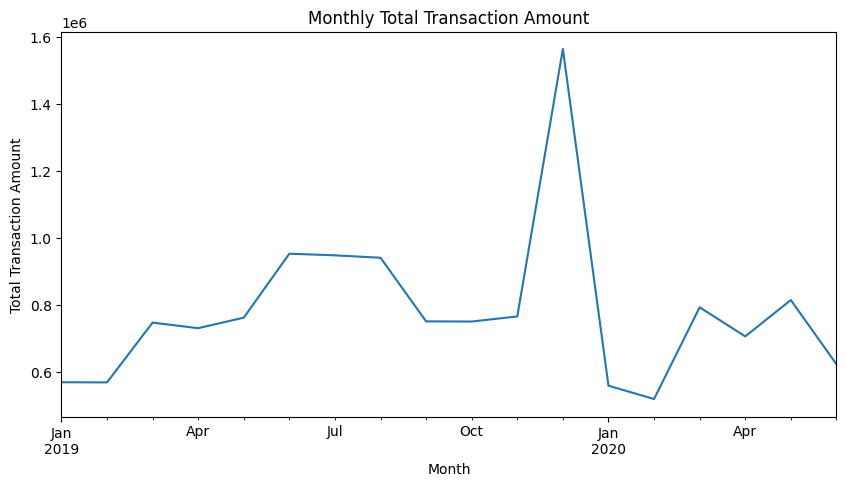

In [24]:
# Create a month column if you haven't
df_sample['month'] = df_sample['trans_date_trans_time'].dt.to_period('M')

monthly = df_sample.groupby('month')['amt'].sum()

plt.figure(figsize=(10,5))
monthly.plot()
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.title('Monthly Total Transaction Amount')
plt.show()

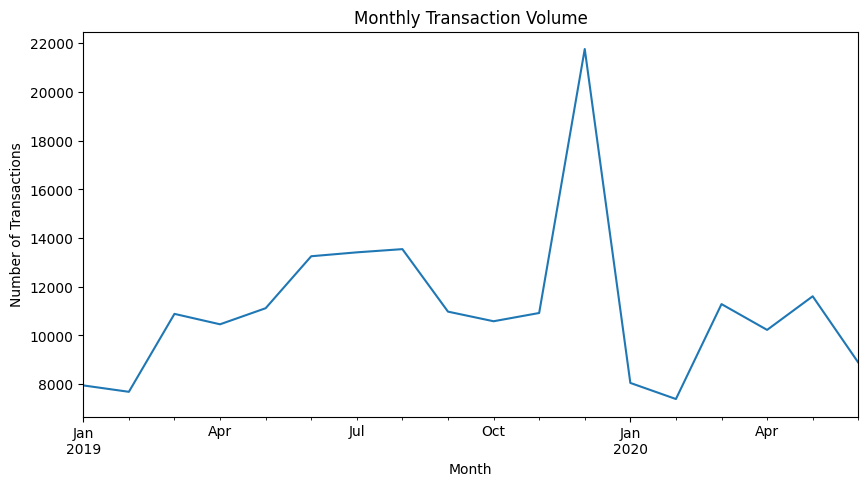

In [26]:
monthly_count = df_sample.groupby('month')['trans_num'].count()

plt.figure(figsize=(10,5))
monthly_count.plot()
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Volume')
plt.show()

## 9. Bivariate Analysis
We explore relationships between two variables, focusing on how fraud relates to transaction amount, category, and time.


In [28]:
df_sample.groupby('is_fraud')['amt'].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,198811.0,67.413114,154.193544,1.00,9.60,47.25,82.44,28948.90
1,1189.0,547.753600,388.952029,5.21,267.54,524.44,906.28,1376.04


<Figure size 800x500 with 0 Axes>

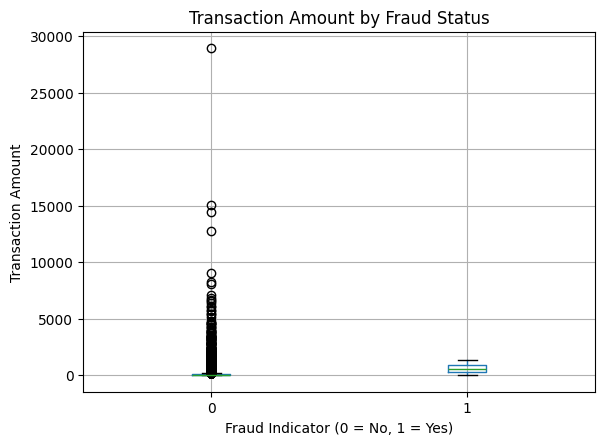

In [29]:
plt.figure(figsize=(8,5))
df_sample.boxplot(column='amt', by='is_fraud')
plt.xlabel('Fraud Indicator (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Fraud Status')
plt.suptitle('')
plt.show()


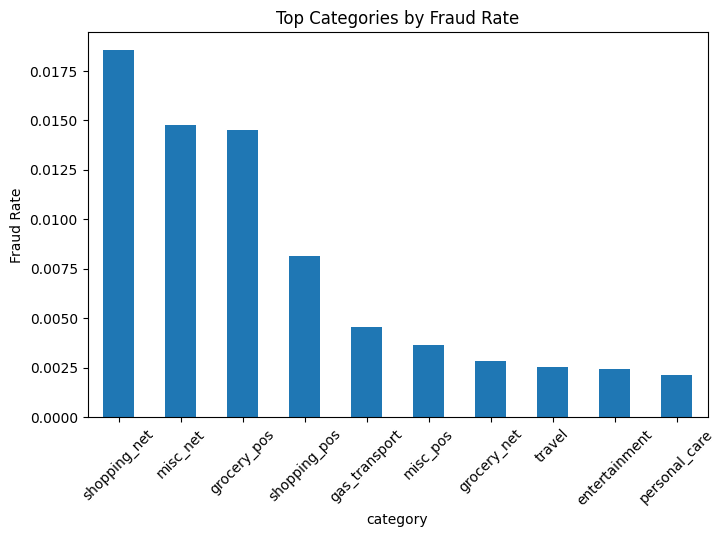

In [30]:
#Fraud Rate by Category
fraud_by_category = df_sample.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
fraud_by_category.head(10).plot(kind='bar')
plt.ylabel('Fraud Rate')
plt.title('Top Categories by Fraud Rate')
plt.xticks(rotation=45)
plt.show()


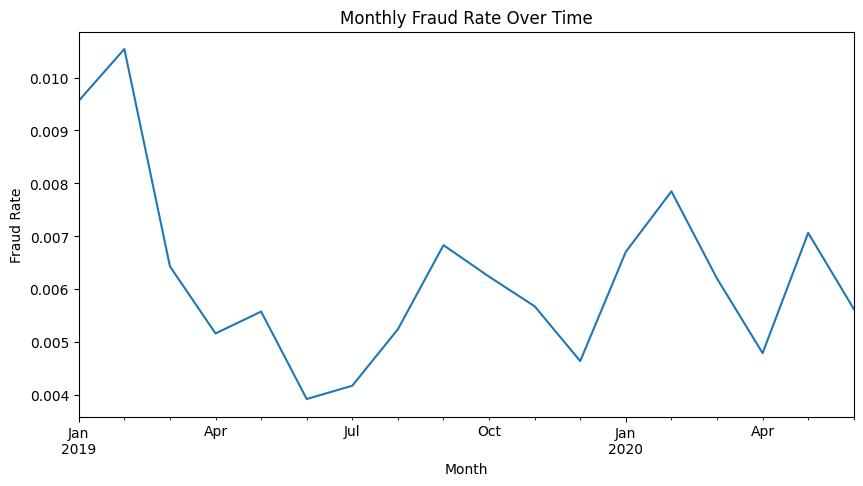

In [31]:
#Fraud Rate Over Time (Monthly)
monthly_fraud = df_sample.groupby('month')['is_fraud'].mean()

plt.figure(figsize=(10,5))
monthly_fraud.plot()
plt.xlabel('Month')
plt.ylabel('Fraud Rate')
plt.title('Monthly Fraud Rate Over Time')
plt.show()


## Transaction Amount vs Category (Spending Behavior)
## Question 
## Which categories tend to have higher transaction amounts?

In [38]:
# Average transaction amount by category
avg_amt_category = (
    df_sample
    .groupby('category')['amt']
    .mean()
    .sort_values(ascending=False)
)

avg_amt_category.head(10)

category
grocery_pos      116.674614
travel           108.445557
shopping_net      88.699898
misc_net          81.473908
shopping_pos      79.448463
misc_pos          64.699208
entertainment     63.828118
gas_transport     63.385443
home              58.352736
kids_pets         57.035211
Name: amt, dtype: float64

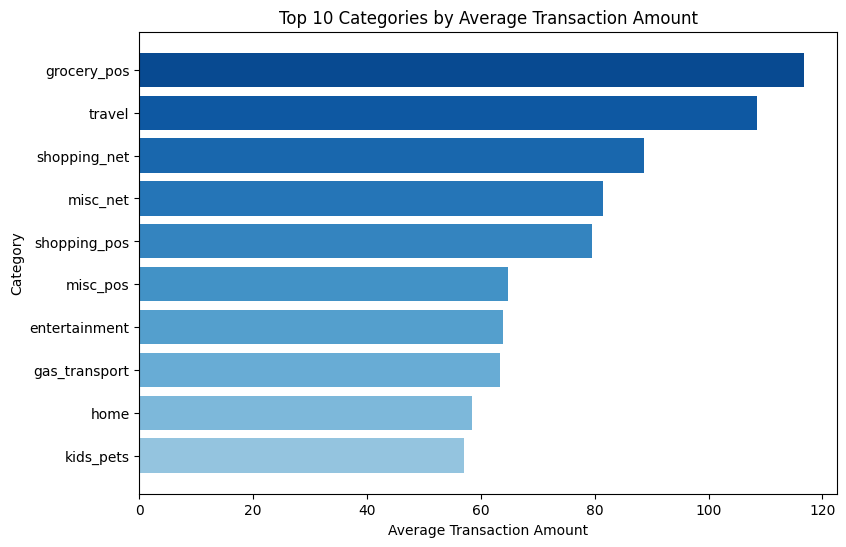

In [34]:
avg_amt_category = (
    df_sample
    .groupby('category')['amt']
    .mean()
    .sort_values(ascending=True)  # ascending for horizontal bar readability
)

top_categories = avg_amt_category.tail(10)

import matplotlib.cm as cm
import numpy as np

colors = cm.Blues(np.linspace(0.4, 0.9, len(top_categories)))

plt.figure(figsize=(9,6))

plt.barh(
    top_categories.index,
    top_categories.values,
    color=colors
)

plt.xlabel('Average Transaction Amount')
plt.ylabel('Category')
plt.title('Top 10 Categories by Average Transaction Amount')

plt.show()


## 10. Advanced Analysis
We analyze patterns by hour of day and compare behavior across years to capture deeper temporal dynamics.

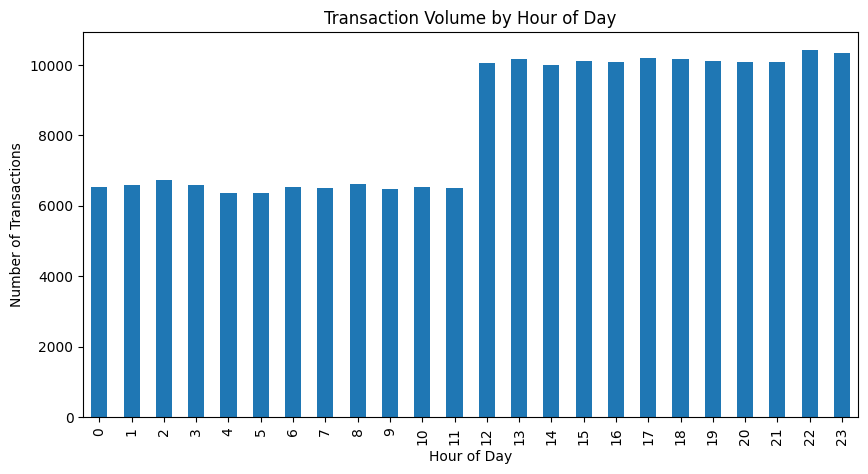

In [32]:
hourly_volume = df_sample.groupby('hour')['trans_num'].count()

plt.figure(figsize=(10,5))
hourly_volume.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume by Hour of Day')
plt.show()


## fraud  

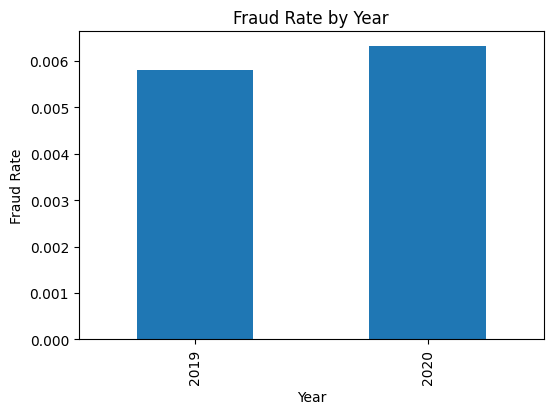

In [35]:
#Fraud Rate by Year + Volume by Year
yearly_fraud_rate = df_sample.groupby('year')['is_fraud'].mean()

plt.figure(figsize=(6,4))
yearly_fraud_rate.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Year')
plt.show()


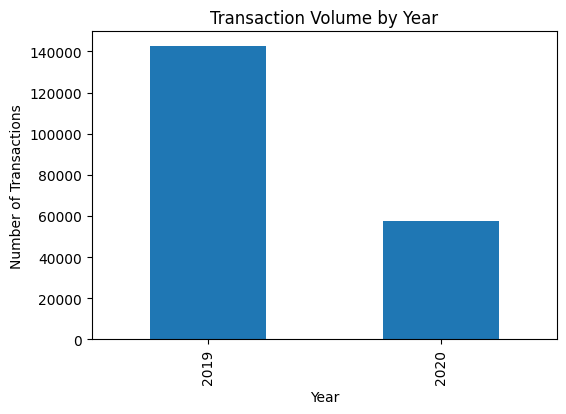

In [36]:
yearly_volume = df_sample.groupby('year')['trans_num'].count()

plt.figure(figsize=(6,4))
yearly_volume.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume by Year')
plt.show()
